In [1]:
import pandas as pd
import os
import glob

input_file = r'path'

all_file=glob.glob(os.path.join(input_file, 'start file name + *'))
# print(all_file)
alldata=[]
for file in all_file:
    df=pd.read_csv(file, encoding='CP949')
    alldata.append(df)
dataCombine=pd.concat(alldata, axis=0, ignore_index=True)
len(dataCombine)


2441560

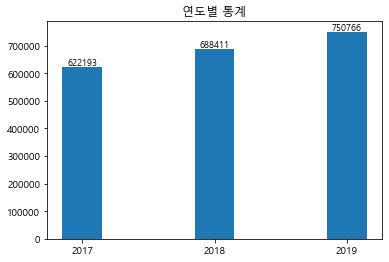

In [2]:
# 세로 바 차트
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 연도별 통계
year_static=dataCombine.groupby(['연도'])['연도'].count().values
values=[year_static[0],year_static[1],year_static[2]]
year_type=['2017','2018','2019']

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# plt.figure(figsize=(10,3))

plt.bar(year_type, values, width=0.3)
plt.xticks(year_type)
plt.title("연도별 통계")

for i, v in enumerate(year_type):
    plt.text(v, values[i], values[i], fontsize=9,
            horizontalalignment='center',
             verticalalignment='bottom')

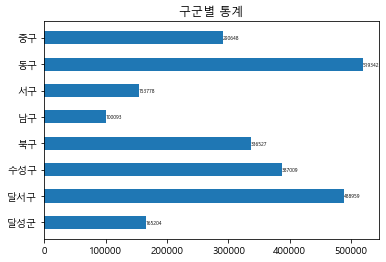

In [3]:
# 가로 바 차트
# 구군별 통계
gugun_static=dataCombine.groupby(['구군'])['구군'].count().reindex(['구, 구군']).values
values=[]
for i in gugun_static:
    values.append(i)
gugun_type=['구, 구군']

plt.barh(gugun_type, values, height=0.5)
plt.yticks(gugun_type)
plt.title("구군별 통계")
for i, v in enumerate(gugun_type):
    str_val=values[i]
    plt.text(values[i], v, str_val, fontsize=5,
            horizontalalignment='left', verticalalignment='center')

In [ ]:
dataCombine.groupby(['구군'])['구군'].count()

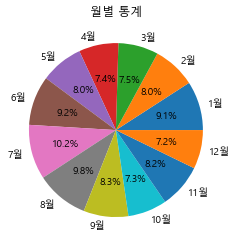

<Figure size 1080x1080 with 0 Axes>

In [4]:
# 파이 차트
# 월별 통계
month_type=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
month_static=dataCombine.groupby(['월'])['월'].count().values
values=[]
for i in month_static:
    values.append(i)
    
plt.title("월별 통계")
plt.pie(values,
        labels=month_type,
        autopct='%1.1f%%',
       )
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
dataCombine.groupby(['월'])['월'].count()

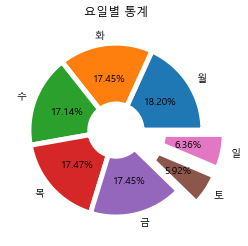

In [5]:
# 파이 차트
# 요일별 통계
day_type=['월','화','수','목','금','토','일']
day_static=dataCombine.groupby(['요일'])['요일'].count().reindex(['월','화','수','목','금','토','일']).values
values=[]
for i in day_static:
    values.append(i)
explodes=(0,0,0,0,0,0.25,0.25)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(values,
        labels=day_type,
        autopct='%1.2f%%',
        explode=explodes,
        wedgeprops=wedgeprops
       )
plt.title('요일별 통계')
plt.show()
# dataCombine.groupby(['요일'])['요일'].count()

In [ ]:
dataCombine.groupby(['요일'])['요일'].count()

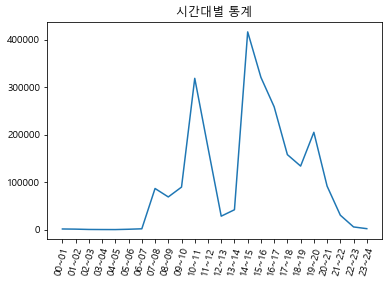

<Figure size 1080x1080 with 0 Axes>

In [6]:
# 추이 차트
# 시간대별 통계
time_type=['00~01','01~02','02~03','03~04','04~05','05~06','06~07','07~08','08~09','09~10',
          '10~11','11~12','12~13','13~14','14~15','15~16','16~17','17~18','18~19',
          '19~20','20~21','21~22','22~23','23~24']
time_static=dataCombine.groupby(['시간대'])['시간대'].count().values
values=[]
for i in time_static:
    values.append(i)
plt.title("시간대별 통계")
plt.plot(time_type, values)
plt.xticks(time_type, fontsize=10, rotation=75)
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
dataCombine.groupby(['시간대'])['시간대'].count()

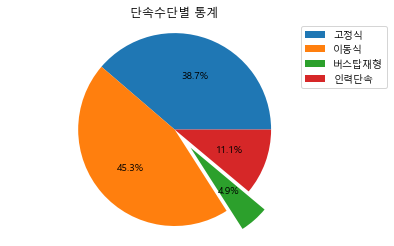

In [7]:
# 파이 차트
# 단속수단별 통계
way_static=dataCombine.groupby(['단속수단'])['단속수단'].count().reindex(['고정식','이동식','버스탑재형','인력단속']).values
values=[945068, 1107156, 118774,  270562]
# for i in way_static:
#     values.append(i)
way_label=['고정식','이동식','버스탑재형','인력단속']

explodes=(0,0,0.25,0)
plt.pie(values,
        explode=explodes,
       autopct='%1.1f%%')
plt.title('단속수단별 통계')
plt.axis('equal')
plt.legend(way_label, loc='upper right', bbox_to_anchor=(1.15,1))
plt.show()

In [ ]:
dataCombine.groupby(['단속수단'])['단속수단'].count()

In [ ]:
# 장소별 통계
location_static=dataCombine[dataCombine['구군']=='구, 구군'].groupby(['장소'])['장소'].count().sort_values(ascending=False).head(60)
location_static
# location_static.sort_values(ascending=False)
# location=dataCombine[dataCombine['구군']]
# dataCombine.groupby(['장소'])['장소'].count().sort_values(ascending=False).head(60)
# dataCombine.groupby(by=['구군','장소'])['구군'].count().sort_values(ascending=False)

In [ ]:
location_static=dataCombine[(dataCombine['단속수단']=='이동식') & (dataCombine['구, 구군']=='구, 구군')].groupby(['장소'])['장소'].count().sort_values(ascending=False).head(60)
location_static

In [ ]:
# location=dataCombine[dataCombine['연도']==2017]
# dataCombine.groupby(['구군'])['단속수단'].count()
dataCombine.groupby(by=['구군', '단속수단'])['구군'].count()